# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter
print('done')

!pip install -U -q PyDrive


done
     |████████████████████████████████| 993kB 3.5MB/s 


In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# links to google drive
link='https://drive.google.com/open?id=18VAiuw3vfETGcuJOdicvkgQT0pSxF7Wy'
link3='https://drive.google.com/open?id=1Z6bjXmyCaoEzXYo_tRDwLTsfeA2F3K3j'
flufff, id2 = link3.split('=')
print (id2) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id2}) 
downloaded.GetContentFile('glove_vectors') 


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

1Z6bjXmyCaoEzXYo_tRDwLTsfeA2F3K3j


## 1.1 Reading Data

In [3]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='


# for project data
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train_data.csv')  
project_data = pd.read_csv('train_data.csv')

print(project_data.shape)



#------------------------------------------------------------------------------------------------


link1='https://drive.google.com/open?id=11uHEj9KOgWD9SU-CPgKyb6VrWqVos4uV'
print('\n--------------------------------------------------------------')

# for resource data
fluff1, idi = link1.split('=')
print (idi) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':idi}) 
downloaded.GetContentFile('resources .csv')  
resource_data = pd.read_csv('resources .csv')


print(resource_data .head(3))

18VAiuw3vfETGcuJOdicvkgQT0pSxF7Wy
(109248, 17)

--------------------------------------------------------------
11uHEj9KOgWD9SU-CPgKyb6VrWqVos4uV
        id                                        description  quantity   price
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1  149.00
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   14.95
2  p069063  Cory Stories: A Kid's Book About Living With Adhd         1    8.45


In [67]:



from sklearn.utils import resample
X = resample(project_data,n_samples = 20000)

X["project_is_approved"].value_counts()

1    16994
0     3006
Name: project_is_approved, dtype: int64

## 1.3 Text preprocessing

In [0]:
# merge two column text dataframe: 
X["essay"] = X["project_essay_1"].map(str) +\
                        X["project_essay_2"].map(str) + \
                        X["project_essay_3"].map(str) + \
                        X["project_essay_4"].map(str)

In [69]:
X.head(2)

Unnamed: 0  ...                                              essay
107191      175099  ...  I am a teacher in a low-income/high poverty sc...
46220        58643  ...  My students come to school every day, dealing ...

[2 rows x 18 columns]

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [72]:
#Proprocessing for essay
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays_train = []
# tqdm is for printing the status bar
for sentance in tqdm(X['essay'].values):
  sent = decontracted(sentance)
  sent = sent.replace('\\r', ' ')
  sent = sent.replace('\\"', ' ')
  sent = sent.replace('\\n', ' ')
  sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
   # https://gist.github.com/sebleier/554280
  sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
  preprocessed_essays_train.append(sent.lower().strip())






#Proprocessing for essay
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_titles_train = []
# tqdm is for printing the status bar
for sentance in tqdm(X['project_title'].values):
  sent = decontracted(sentance)
  sent = sent.replace('\\r', ' ')
  sent = sent.replace('\\"', ' ')
  sent = sent.replace('\\n', ' ')
  sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
   # https://gist.github.com/sebleier/554280
  sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
  preprocessed_titles_train.append(sent.lower().strip())

100%|██████████| 20000/20000 [00:00<00:00, 33361.69it/s]


# Preprocessing of Categorical features

**Preprocessing of project_subject_categories**

---



In [0]:
categories = list(X['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in categories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
    
X['clean_categories'] = cat_list
X.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in X['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


**Preprocessing of project_subject_subcategories**

---



In [0]:
sub_catogories = list(X['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

X['clean_subcategories'] = sub_cat_list
X.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

**Preprocessing of project_grade_category**

---



In [0]:
d= list(X['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

grade_cat_list = []
for i in d:
    # consider we have text like this:
    for j in i.split(' '): #    # split by spae
        j=j.replace('Grades','')# clean grades from the row
    grade_cat_list.append(j.strip())
    


X['clean_grade'] = grade_cat_list 
X.drop(['project_grade_category'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X['clean_grade'].values:
    my_counter.update(word.split())
    
project_grade_category_dict= dict(my_counter)
sorted_project_grade_category_dict = dict(sorted(project_grade_category_dict.items(), key=lambda kv: kv[1]))



#<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

**1. vectorize categorical data**

1.*project*_subject_categories convert categorical to vectors*

---



In [76]:
#For categories
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer1 = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer1.fit(X['clean_categories'].values)

X_train_cat = vectorizer1.transform(X['clean_categories'].values)
print(vectorizer1.get_feature_names())
print("After vectorizations")
print(X_train_cat.shape)


#--------------------------------------------------------------------------------------------------------------------------------------------
#Forsub- categories

vectorizer2 = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer2.fit(X['clean_subcategories'].values)

X_train_subcat = vectorizer2.transform(X['clean_subcategories'].values)
print(vectorizer2.get_feature_names())
print("After vectorizations")
print(X_train_subcat.shape)


#--------------------------------------------------------------------------------------------------------------------------------------------
#For School_state

# now time to cont the each words
from collections import Counter
my_counter = Counter()
for word in X['school_state'].values:
    my_counter.update(word.split())# count the words 

school_state_dict = dict(my_counter)# store in dicionary
sorted_school_state_dict = dict(sorted(school_state_dict.items(), key=lambda kv: kv[1]))# sor it

vectorizer3 = CountVectorizer(vocabulary=list(sorted_school_state_dict.keys()), lowercase=False, binary=True)
vectorizer3.fit(X['school_state'].values)


X_train_school_state = vectorizer3.transform(X['school_state'].values)
print(vectorizer3.get_feature_names())
print("After vectorizations")
print(X_train_school_state.shape)






['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
After vectorizations
(20000, 9)
['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Civics_Government', 'Extracurricular', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'History_Geography', 'Music', 'Health_LifeScience', 'Gym_Fitness', 'ESL', 'EarlyDevelopment', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
After vectorizations
(20000, 30)
['WY', 'VT', 'ND', 'MT', 'SD', 'NH', 'AK', 'NE', 'RI', 'DE', 'HI', 'ME', 'NM', 'DC', 'WV', 'IA', 'KS', 'ID', 'AR', 'CO', 'NV', 'MN', 'OR', 'MS', 'KY', 'MD', 'TN', 'CT', 'AL', 'UT', 'WI', 'NJ', 'VA', 'OK', 'AZ', 'WA', 'MA', 'LA', 'OH', 'IN', 'MO', 'MI', 'PA', 'SC', 'G

In [77]:
#https://stackoverflow.com/questions/42224700/attributeerror-float-object-has-no-attribute-split
X['clean_grade']=X['clean_grade'].fillna("")# fill the nulll values with space

vectorizer4 = CountVectorizer(vocabulary=list(sorted_project_grade_category_dict.keys()), lowercase=False, binary=True)
vectorizer4.fit(X['clean_grade'].values)

X_train_project_grade_category = vectorizer4.transform(X['clean_grade'].values)
print("After vectorizations")
print(X_train_project_grade_category  .shape)

After vectorizations
(20000, 4)


In [0]:
#https://stackoverflow.com/questions/42224700/attributeerror-float-object-has-no-attribute-split
X['teacher_prefix']=X['teacher_prefix'].fillna(" ")# filll the null values with space
my_counter = Counter()
for word in X['teacher_prefix'].values:
    my_counter.update(word.split())

    
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
teacher_cat_dict = dict(my_counter)
sorted_teacher_prefix_dict = dict(sorted(teacher_cat_dict.items(), key=lambda kv: kv[1]))

In [79]:

vectorizer5 = CountVectorizer(vocabulary=list(sorted_teacher_prefix_dict.keys()), lowercase=False, binary=True)
vectorizer5.fit(X['teacher_prefix'].values.astype('U'))


X_train_teacher_prefix = vectorizer5.transform(X['teacher_prefix'].values.astype('U'))
print(vectorizer5.get_feature_names())

print("After vectorizations")
print(X_train_teacher_prefix   .shape)
# when i executeed this error comes
#np.nan is an invalid document, expected byte or unicode string.
# then iconvert to unicode     just writ .astype('U') after the .values in fit and trainform
#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document

['Dr.', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']
After vectorizations
(20000, 5)


#<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

**Apply Baw featurezation** *essay*

---



In [ ]:

X_train_essay=preprocessed_essays_train
X_train_title=preprocessed_titles_train


# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer6 = CountVectorizer(min_df=10,max_features=5000,ngram_range=(1, 2))# its a countvectors used for convert text to vectors
vectorizer6.fit(X_train_essay)# that is learned from trainned  data



# we use the fitted CountVectorizer to convert the text to vector
X_train_bow = vectorizer6.transform(X_train_essay)
# print("After vectorizations")
# print(X_train_bow.shape)

# # so the dimension of alll are the same by using first fit and then transform
# print(vectorizer6.get_feature_names())




vectorizer7 = CountVectorizer(min_df=10,max_features=5000,ngram_range=(1, 2))
vectorizer7.fit(X_train_title)# that is learned from trainned  data



# we use the fitted CountVectorizer to convert the text to vector
X_train_bow_title = vectorizer7.transform(X_train_title)

# print("After vectorizations")
# print(X_train_bow_title.shape)
# print(vectorizer7.get_feature_names())

# 1.5.3 Vectorizing Numerical features¶

In [0]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
X = pd.merge(X, price_data, on='id', how='left')
#print(X)

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
price_scalar =  StandardScaler()

price_scalar.fit(X['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
train_price_standar = price_scalar.transform(X['price'].values.reshape(-1, 1))



# previous_year_projects
price_scalar.fit(X['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
train_prev_proj_standar = price_scalar.transform(X['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))


price_scalar.fit(X['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
train_qnty_standar = price_scalar.transform(X['quantity'].values.reshape(-1, 1))



# **Prepare set**

---



In [83]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_set = hstack((X_train_bow_title,X_train_bow,# all bows
                      X_train_teacher_prefix,X_train_cat,X_train_subcat ,X_train_project_grade_category,X_train_school_state,#all categorials
                      train_qnty_standar,train_price_standar,train_prev_proj_standar))# all numericals


print(X_set.shape)

cat=vectorizer1.get_feature_names()
subcat=vectorizer2.get_feature_names()
school=vectorizer3.get_feature_names()
grade=vectorizer4.get_feature_names()
tec=vectorizer5.get_feature_names()
bow=vectorizer6.get_feature_names()
title=vectorizer7.get_feature_names()


(20000, 6585)


In [84]:
set_feature = bow + title + tec + cat + subcat + grade + school

set_feature.append("quantity")
set_feature.append("price")
set_feature.append("teacher_number_of_previously_posted_projects")
print(len(set_feature))

6585


In [0]:
from wordcloud import WordCloud 
def Plot_wordcloud(cluster):
    words = " "
    for ew in cluster:
        tokens = ew.split()
        for w in tokens:
            words = words+ " "+ w
        
    wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,
                          min_font_size = 10).generate(words) 
    # plot the WordCloud image                        
    plt.figure(figsize = (8,8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0)
    plt.title("Word Cloud Plot")
    plt.show()

**Reduce features by pca**

In [85]:
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA





pca = PCA(n_components=5000)
X_set = pca.fit_transform(X_set.toarray())
print(X_set.shape)

(20000, 5000)


# Apply k-means clustering

---



In [0]:
k = [1,2,3,5,7,8]
k_info = dict()

for i in k:
    temp = dict()
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_set)
    #_-------------------------------------We have to take the log of the inertia ,otherwise it shows very big values like 15000000, so make it precise.-------------------------------------
    temp["inertia"] = np.log(kmeans.inertia_)
    temp["labels"] = kmeans.labels_
    k_info[i] = temp
    
inertia = [x["inertia"] for x in k_info.values()]

**Elbow plot (find best k)**

---



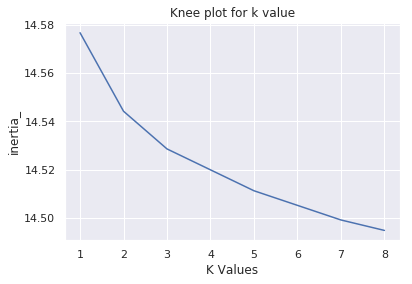

In [42]:
sns.set()
plt.plot(k,inertia)
plt.xlabel("K Values")
plt.ylabel("inertia_")
plt.title("Knee plot for k value")
plt.show()

**Observations:**

---



 See the plot,after the k=2, the curve moving down fastly
 
 Also in donors dataset with the  domain knowledge, we know k=2

**Now take k=2**

---



Text(0.5, 1.0, 'Train data cluster plot')

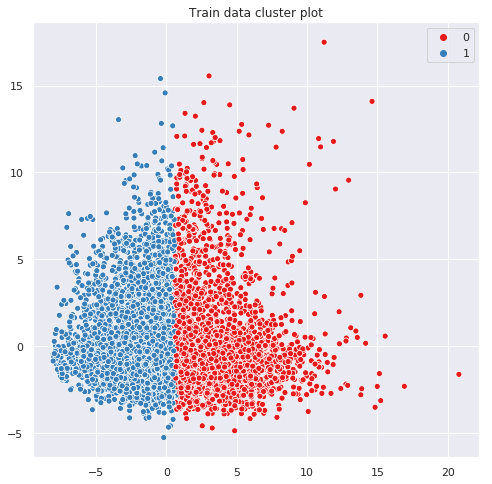

In [29]:
kmeans = KMeans(n_clusters=2).fit(X_set)
# converting set_ to two dimetional using pca for visiualization.
pca = PCA(n_components=2)
set_v = pca.fit_transform(X_set)

sns.set()
plt.figure(figsize=(8,8))
sns.scatterplot(x=set_v[:,0], y=set_v[:,1],hue=kmeans.labels_,palette="Set1")
plt.title("Train data cluster plot")

**Observations:**

We can see the the 2 cluster's inter range is  very less, So their may be the chances of wrong predictions of the points that are close to the decision boundary.

---



**Word Plot of the essays for both clusters**

steps:
------------------------------------------------------------------------------------------------------------------------------------------------

1. Take the outlabels (Predictions of kmeans   (0-1)) in one array

2. Make 2 arras , then iterate  ->  if prediction is 1 add coresponding essay statement or vicevera
---



In [0]:
t_p=[]
for i in tqdm(range(X_set.shape[0])):
    t = np.expand_dims(X_set[i],axis = 0)# we convert to 2d it is required because our inital array is 1d
    t_p.append(kmeans.predict( t)[0])

In [0]:
#https://www.geeksforgeeks.org/enumerate-in-python/
cluster_0=[]
cluster_1=[]

for i,j  in enumerate(t_p): # i am getting count object with iterators.
  # i is the index, j is the label
  if j:
    cluster_1.append(X['essay'].iloc[i])
  else:
    cluster_0.append(X['essay'].iloc[i])# i loc means adding the row   -< in this iloc means adding essay one statement in one row.
    
 
  


**Word plot for the +ve clusters**

---



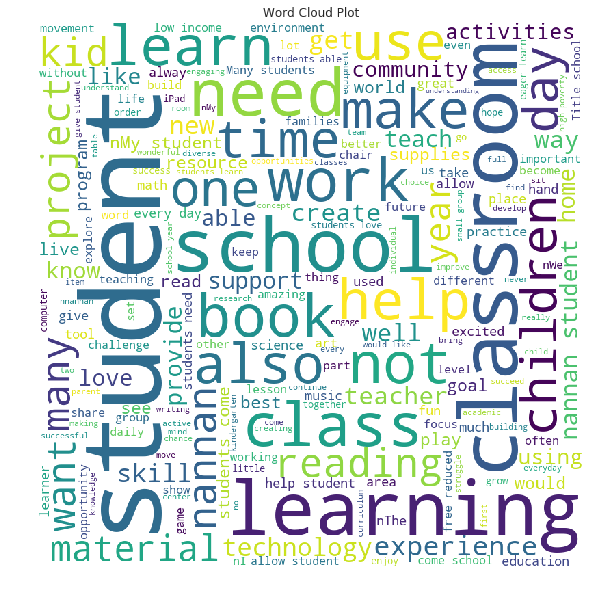

In [38]:
Plot_wordcloud(cluster_1)

**Word plot for the -ve clusters**

---



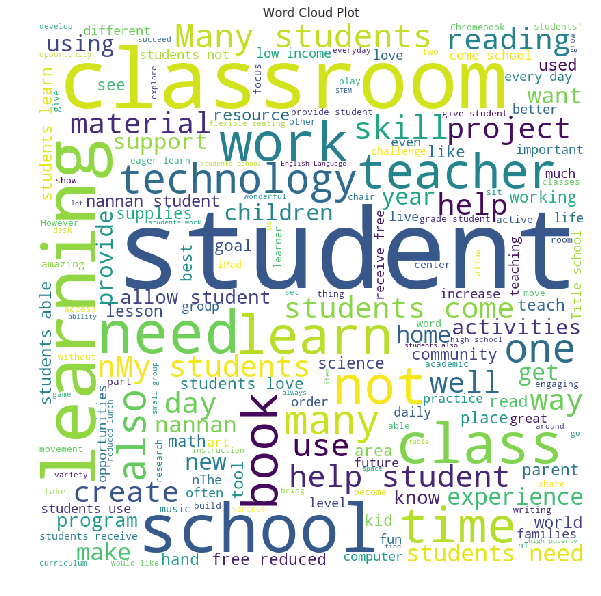

In [39]:
Plot_wordcloud(cluster_0)

# Summary:


1.For k=2, clusters are  well seprated but , Sepration margin is less.So their is a  chances of wrong predictions of points, 

which are  very close or in the decision boundary.

2.  Student, school, classroom, learning are the words most occuring in +ve cluster.


3. Also  Student, school, classroom, learning is the words most occuring in -ve cluster, I can observe this is the reason of being wrong predictions.



# Apply Agglomerative Clustering

In [0]:
from sklearn.cluster import AgglomerativeClustering

**First take 2 clusters**

---



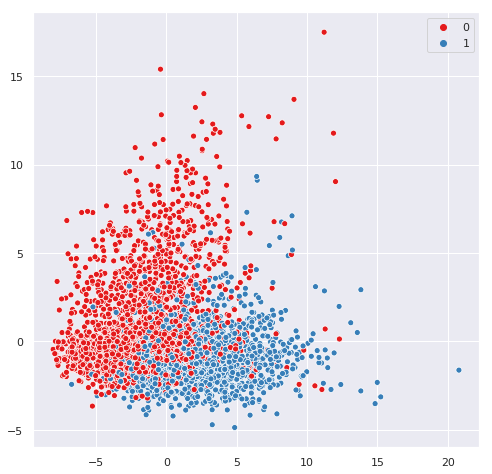

In [46]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X_set)

# plotting the cluster
sns.set()
plt.figure(figsize=(8,8))

sns.scatterplot(x=visualzation[:,0], y=visualzation[:,1],hue=cluster.labels_,palette="Set1")

**Observations:**
We can see the overlapping clusters.



**Take 3 clusters**

---


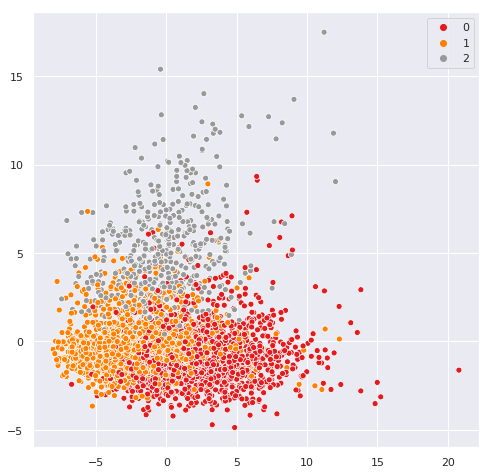

In [47]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X_set)

# plotting the cluster
sns.set()
plt.figure(figsize=(8,8))
sns.scatterplot(x=visualzation[:,0], y=visualzation[:,1],hue=cluster.labels_,palette="Set1")

**Observations:**
Our datapoitns are very dense in this, So that's why overlapping clusters.



**Take 5 clusters**

---



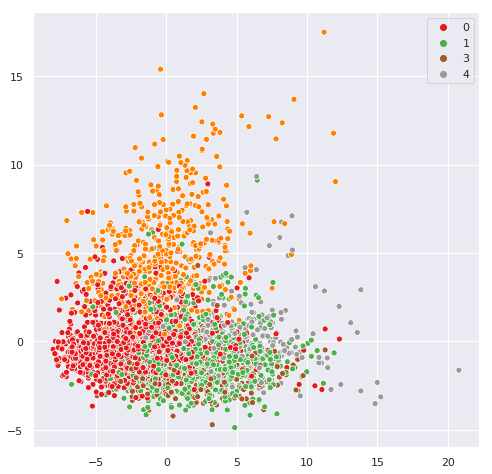

In [48]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X_set)

# plotting the cluster
sns.set()
plt.figure(figsize=(8,8))
sns.scatterplot(x=visualzation[:,0], y=visualzation[:,1],hue=cluster.labels_,palette="Set1")

**Make a prediction with 2 clusters, because we know from the domain knowledge of donors, we have 2 classes**

---



In [0]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X_set)

**Word Plot of the essays for both clusters**

steps:
------------------------------------------------------------------------------------------------------------------------------------------------

1. Take the outlabels (Predictions of kmeans   (0-1)) in one array

2. Make 2 arras , then iterate  ->  if prediction is 1 add coresponding essay statement or vicevera
---



In [0]:
#https://www.geeksforgeeks.org/enumerate-in-python/
cluster_0=[]
cluster_1=[]

for i,j  in enumerate(cluster.labels_): # i am getting count object with iterators.
  # i is the index, j is the label
  if j:
    cluster_1.append(X['essay'].iloc[i])
  else:
    cluster_0.append(X['essay'].iloc[i])# i loc means adding the row   -< in this iloc means adding essay one statement in one row.
    
 
  


**Wordplot for -ve cluster**

---



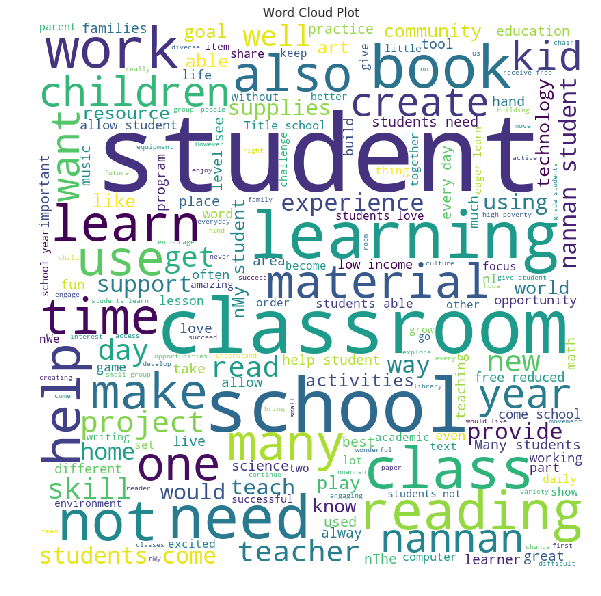

In [52]:
Plot_wordcloud(cluster_0)


**Wordplot for +ve cluster**

---



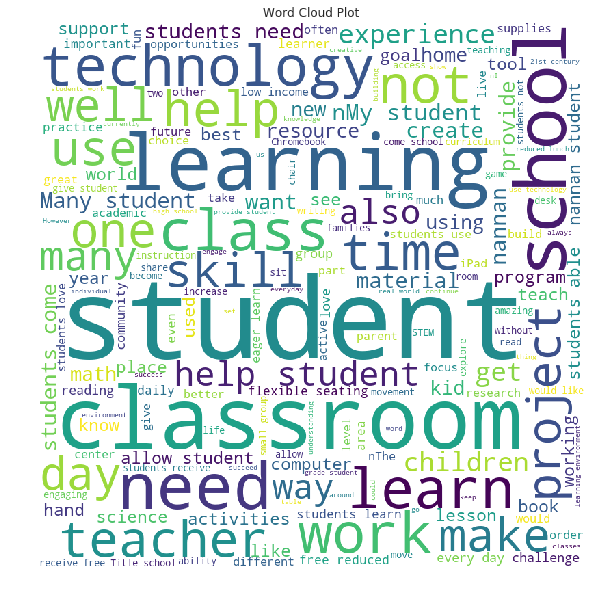

In [53]:
Plot_wordcloud(cluster_1)


# Summary:

1.As our datapoints are very dense in this plots, so making predictions is difficult, Flase negatives and false positives 'll be more if we apply any classification model top of it.

2.Student,classroom, learning  and school are the most occuring words in the essay of the -ve cluster.

3.Student,classroom, learning  and school are  also the most occuring words in the essay of the +ve cluster.

# Apply DBSCAM

In [0]:
# take less data points for the dbscam
X_set=X_set[:5000]

minpoints=7   #   As log(n) =7 , n is the number of datapoints

**Steps for Finding the elipson, as we have minpoints:**

1.For each Xi in the dataset find the kth neibhour distance.

2.K in this loop is the number of minpoints.

3.Sort the Kth distances of all Xi's.Store it in the array.

4.Save it in the array, plot it.

---



In [0]:
# Distance Function to get distance between two vectors.
# took referance form https://www.python-course.eu/k_nearest_neighbor_classifier.php
#https://github.com/Raman-Raje/donorschoose/blob/master/clustering/raman.shinde15%40gmail.com_10.ipynb
#https://stackoverflow.com/questions/12893492/choosing-eps-and-minpts-for-dbscan-r/48558030#48558030



def distance(instance1, instance2):
    # just in case, if the instances are lists or tuples:
    instance1 = np.array(instance1) 
    instance2 = np.array(instance2)
    
    return np.linalg.norm((instance1 - instance2),ord = 2)


# get_neighbours function returns distance of kth nearest neighbours.
def get_neighbors(training_set,test_instance, k, distance=distance):
    """
    get_neighors calculates a list of the k nearest neighbors
    of an instance 'test_instance'.
    The list neighbors contains 3-tuples with  
    (index, dist, label)
    """
    distances = []
    for index in range(len(training_set)):
        dist = distance(test_instance, training_set[index])
        distances.append(dist)
    distances.sort()
    neighbors = distances[k]
    return neighbors

In [0]:
# iterate over set of all data points and collect distances in eps.
eps = []

for i in range(X_set.shape[0]):
    eps.append(get_neighbors(X_set,X_set[i],minpoints))
    
    # we have to get the neibhours,   so parameter we give is      all datapoints, curent datapoint for which i have to find the neibohurs, and minpoints.

In [0]:
sorted_eps = sorted(eps)

([<matplotlib.axis.YTick at 0x7f174693e390>,
 <a list of 9 Text yticklabel objects>)

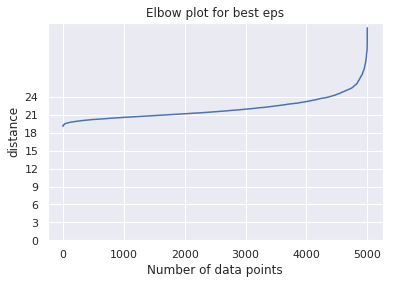

In [59]:
sns.set()
plt.plot(sorted_eps)
plt.xlabel("Number of data points")
plt.ylabel("distance")
plt.title("Elbow plot for best eps")
plt.yticks([x for x in range(0,25,3)])

**Observations:**

As you can see after the 24th distance,   our distance curve moving up fastly, so we take 24 distance as elipson

**Use the eps which you find optimal**

---



In [0]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 24,min_samples=4000).fit(X_set)
labels = db.labels_

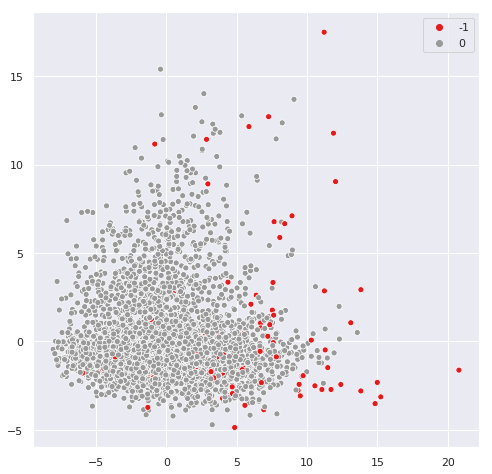

In [65]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=visualzation[:,0], y=visualzation[:,1],hue=labels,palette="Set1")

In [0]:
#https://www.geeksforgeeks.org/enumerate-in-python/
cluster_0=[]
cluster_1=[]

for i,j  in enumerate(labels): # i am getting count object with iterators.
  # i is the index, j is the label
  if j:
    cluster_1.append(X['essay'].iloc[i])
  else:
    cluster_0.append(X['essay'].iloc[i])# i loc means adding the row   -< in this iloc means adding essay one statement in one row.
    
 
  


**Wordplot for +ve cluster**

---



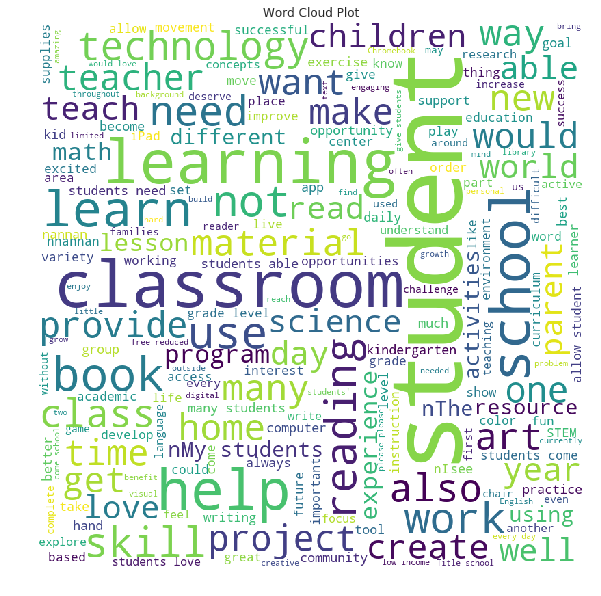

In [63]:
Plot_wordcloud(cluster_1)


**Wordplot for -ve cluster**

---



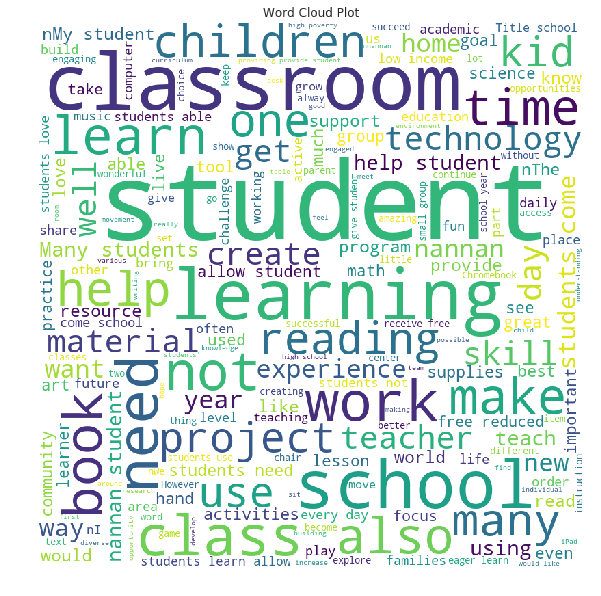

In [64]:
Plot_wordcloud(cluster_0)



# Sumamary:

1.Plot of DBSCAM is totally different from the kmeans and Agglomerative clustering.

2.student, classroom, learning are the most occuring words in the -ve cluster.

3.student, classroom, learning are also  the most occuring words in the +ve cluster.

---



# Conclusion   (Comparasion of models)

In [1]:
from prettytable import PrettyTable
tb = PrettyTable() 
tb.field_names= ("Model", "Best-parameter", "Observations") 
tb.add_row(["K-Means",             " k=2"    ,          "Clusters intra range is not good, so chances of being wrong predicted are high, in close to decision plane."                   ]) 
tb.add_row(["Agglomerative",     " ------ "  ,         "This are totally overlapping clusters, and it looks like datapoints are very dense."              ])
tb.add_row(["DBSCAM",                  "elipson=18 ", "This has totally different results, all are predicted zero."           ])
print(tb.get_string(titles = "Clustering Models - Observations"))

+---------------+----------------+-------------------------------------------------------------------------------------------------------------+
|     Model     | Best-parameter |                                                 Observations                                                |
+---------------+----------------+-------------------------------------------------------------------------------------------------------------+
|    K-Means    |       k=2      | Clusters intra range is not good, so chances of being wrong predicted are high, in close to decision plane. |
| Agglomerative |     ------     |             This are totally overlapping clusters, and it looks like datapoints are very dense.             |
|     DBSCAM    |  elipson=18    |                         This has totally different results, all are predicted zero.                         |
+---------------+----------------+------------------------------------------------------------------------------------------------

Thanks.